In [134]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
queries = pd.read_csv('trends.csv')
queries_global = queries[queries['location'] == 'Global']
queries_global = queries_global.drop_duplicates(subset=['query']).reset_index(drop=True)

In [136]:
queries_global

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe
...,...,...,...,...,...
914,Global,2020,Recipes,3,Sourdough bread
915,Global,2020,Recipes,5,Lahmacun
916,Global,2020,TV Shows,1,Tiger King
917,Global,2020,TV Shows,3,Money Heist


#### Plot number of queries per category

In [137]:
categories_grouped = queries_global.groupby('category').count()
categories_grouped = categories_grouped.drop(['location', 'year', 'rank'], axis=1).reset_index(drop=False)

In [138]:
#categories_grouped

In [139]:
categories_grouped_sorted = categories_grouped.sort_values(by=['query'], ascending=False).reset_index(drop=True)

In [140]:
categories_grouped_sorted

,category,query
0,TV Shows,45
1,People,43
2,Movies,41
3,Searches,34
4,Athletes,31
...,...,...
123,Images,2
124,Cartoons Images,2
125,People: Fastest Rising,1
126,Fictional Character Images,1


<function matplotlib.pyplot.show(close=None, block=None)>

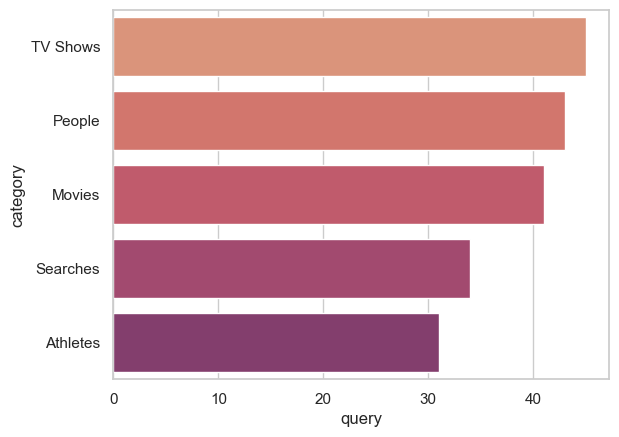

In [143]:
sns.barplot(data=categories_grouped_sorted.head(5), x="query", y="category", palette = sns.color_palette("flare"), orient='h')
#plt.savefig("amount_of_queries_per_category.png")
plt.show

In [ ]:
#These are the 5 categories with the most search querys

#### How one sees the popularity level over time for a search query

In [36]:
dataset_for_modeling = pd.read_csv('complete_dataset_cleaned.csv')

In [65]:
#dataset_for_modeling

In [56]:
dataset_for_modeling['date'] = pd.to_datetime(dataset_for_modeling['date'])

In [39]:
def createHorizontalDataFrameAll(df):
    new_dataFrame = pd.DataFrame()
    for column in df.columns:
        column_own = df[['date', column]].copy()
        #column_own_last = column_own.iloc[-30:].reset_index(drop=True)
        column_list = [column]
        column_values = list(column_own[column])
        data_list_column = column_list + column_values
        df_column = pd.DataFrame([data_list_column])
        df_column = df_column.rename(columns={0: 'Query'})
        new_dataFrame = pd.concat([new_dataFrame, df_column], axis=0)
    
    #drop first row
    new_dataFrame = new_dataFrame.iloc[1:].reset_index(drop=True)
    return new_dataFrame

In [40]:
swapped_dataset_all = createHorizontalDataFrameAll(dataset_for_modeling)

In [42]:
#swapped_dataset_all

In [43]:
validation_dataset = pd.read_csv('validation_dataset.csv')

In [45]:
#validation_dataset

In [46]:
swapped_dataset_val = createHorizontalDataFrameAll(validation_dataset)

In [48]:
#swapped_dataset_val

In [51]:
model_and_val_dataset = pd.concat([swapped_dataset_all, swapped_dataset_val], axis=0).reset_index(drop=True)

In [52]:
model_and_val_dataset

,Query,1,2,3,4,5,6,7,8,9,...,223,224,225,226,227,228,229,230,231,232
0,Nokia,74,66,64.0,66.0,63.0,68.0,76.0,68.0,70.0,...,5.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,Sony,88,78,78.0,72.0,74.0,83.0,86.0,83.0,82.0,...,14.0,14.0,13.0,13.0,15.0,15.0,14.0,14.0,13.0,13.0
2,BMW,12,10,11.0,11.0,11.0,11.0,10.0,10.0,11.0,...,9.0,9.0,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0
3,Palm,100,91,90.0,84.0,80.0,80.0,78.0,80.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Adobe,84,80,79.0,74.0,74.0,74.0,75.0,73.0,77.0,...,21.0,0.0,23.0,23.0,0.0,0.0,0.0,25.0,25.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,Sourdough bread,7,7,3.0,4.0,5.0,3.0,4.0,4.0,5.0,...,21.0,23.0,21.0,23.0,24.0,26.0,32.0,34.0,31.0,26.0
900,Lahmacun,5,3,3.0,2.0,4.0,4.0,3.0,4.0,2.0,...,61.0,62.0,52.0,58.0,54.0,58.0,62.0,54.0,56.0,62.0
901,Tiger King,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
902,Money Heist,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,8.0,6.0,6.0,5.0,10.0,7.0,6.0,6.0,6.0


<function matplotlib.pyplot.show(close=None, block=None)>

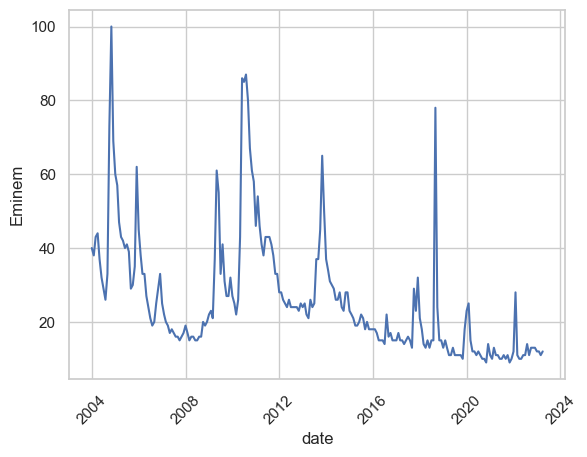

In [58]:
sns.set_theme(style="whitegrid")
fig=sns.lineplot(x=dataset_for_modeling['date'],y=dataset_for_modeling['Eminem'])
fig=plt.xticks(rotation=45)
plt.savefig("Eminem_interest_over_time.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

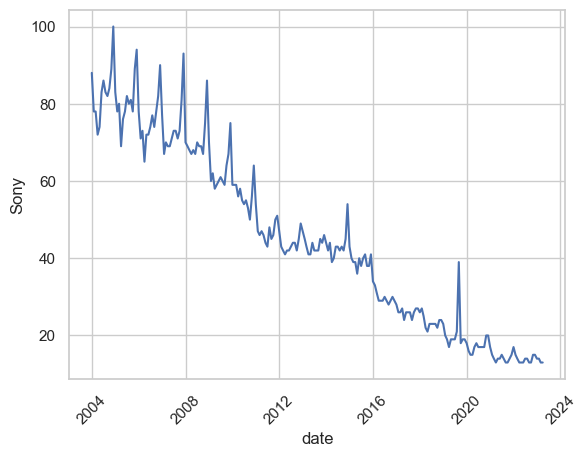

In [63]:
sns.set_theme(style="whitegrid")
fig=sns.lineplot(x=dataset_for_modeling['date'],y=dataset_for_modeling['Sony'])
fig=plt.xticks(rotation=45)
plt.savefig("Sony_interest_over_time.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

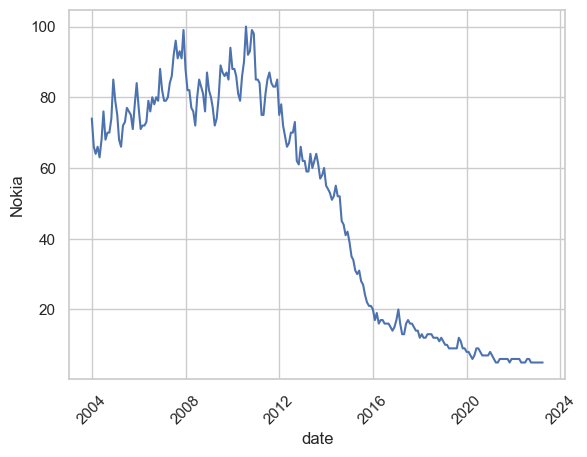

In [64]:
sns.set_theme(style="whitegrid")
fig=sns.lineplot(x=dataset_for_modeling['date'],y=dataset_for_modeling['Nokia'])
fig=plt.xticks(rotation=45)
#plt.savefig("Nokia_interest_over_time.png")
plt.show

#### Append category to search query as new column:

In [71]:
category_list = []
for query in model_and_val_dataset['Query']:
    category_row = queries_global.loc[queries_global['query'] == query]
    category = list(category_row['category'])[0]
    category_list.append(category)
#print(category_list)

In [72]:
len(category_list)

904

In [73]:
model_and_val_dataset.insert(1, "category", category_list, True)

In [78]:
#model_and_val_dataset

#### Are there differences in the mean popularity levels per category?

In [75]:
model_and_val_dataset['mean'] = model_and_val_dataset.iloc[:, 2:].mean(axis=1)

In [76]:
model_and_val_dataset

,Query,category,1,2,3,4,5,6,7,8,...,224,225,226,227,228,229,230,231,232,mean
0,Nokia,Consumer Brands,74,66,64.0,66.0,63.0,68.0,76.0,68.0,...,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,48.025862
1,Sony,Consumer Brands,88,78,78.0,72.0,74.0,83.0,86.0,83.0,...,14.0,13.0,13.0,15.0,15.0,14.0,14.0,13.0,13.0,45.051724
2,BMW,Consumer Brands,12,10,11.0,11.0,11.0,11.0,10.0,10.0,...,9.0,8.0,8.0,8.0,8.0,9.0,9.0,9.0,9.0,9.909483
3,Palm,Consumer Brands,100,91,90.0,84.0,80.0,80.0,78.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.038793
4,Adobe,Consumer Brands,84,80,79.0,74.0,74.0,74.0,75.0,73.0,...,0.0,23.0,23.0,0.0,0.0,0.0,25.0,25.0,22.0,46.987069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,Sourdough bread,Recipes,7,7,3.0,4.0,5.0,3.0,4.0,4.0,...,23.0,21.0,23.0,24.0,26.0,32.0,34.0,31.0,26.0,8.853448
900,Lahmacun,Recipes,5,3,3.0,2.0,4.0,4.0,3.0,4.0,...,62.0,52.0,58.0,54.0,58.0,62.0,54.0,56.0,62.0,26.262931
901,Tiger King,TV Shows,1,1,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.702586
902,Money Heist,TV Shows,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,6.0,6.0,5.0,10.0,7.0,6.0,6.0,6.0,3.202586


In [115]:
categories_grouped_all = model_and_val_dataset.groupby('category')['mean'].agg(['mean']).reset_index()
categories_grouped_all = categories_grouped.sort_values(by=['mean'], ascending=False).reset_index(drop=True)

In [116]:
categories_grouped_all

,category,mean
0,Political News Sources,59.087644
1,Professional Services,56.875000
2,Health Services,52.567241
3,Car Images,52.096264
4,Foods,50.636207
...,...,...
123,Events,1.777155
124,Memes,1.539655
125,Passings,1.457974
126,Videos,1.364224


<function matplotlib.pyplot.show(close=None, block=None)>

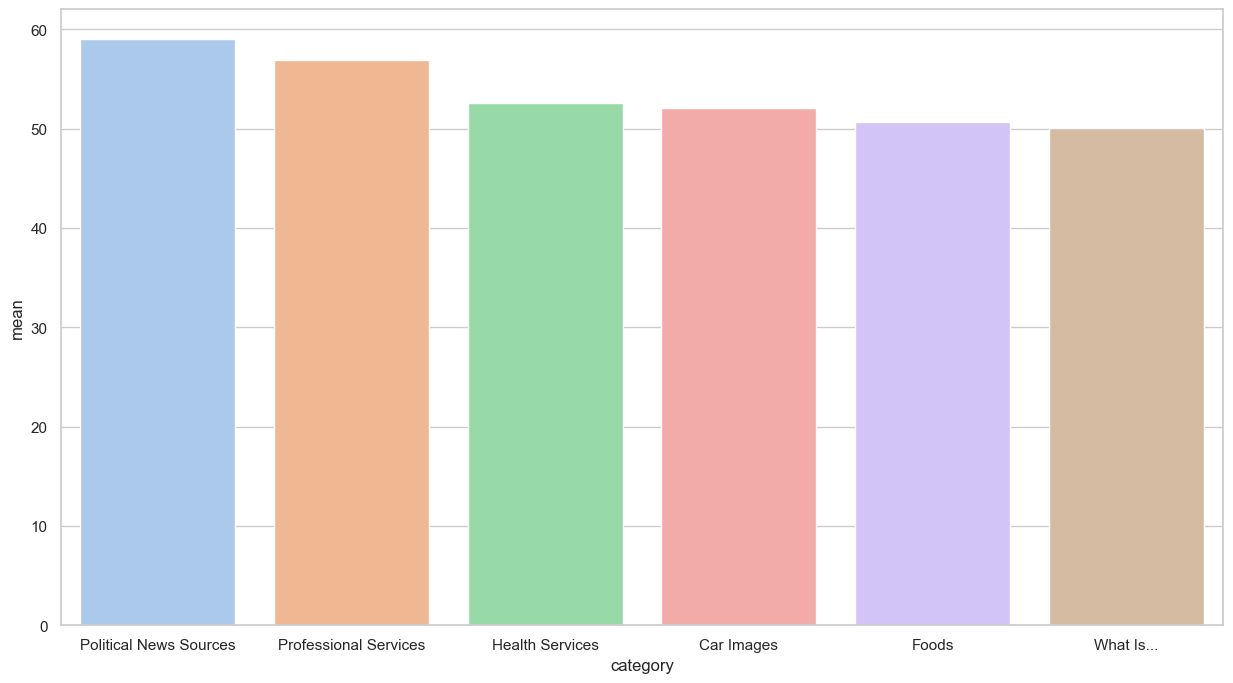

In [132]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=categories_grouped_all.head(6), x="category", y="mean", palette = sns.color_palette('pastel'))
#plt.savefig("mean_popularity_level_per_category.png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

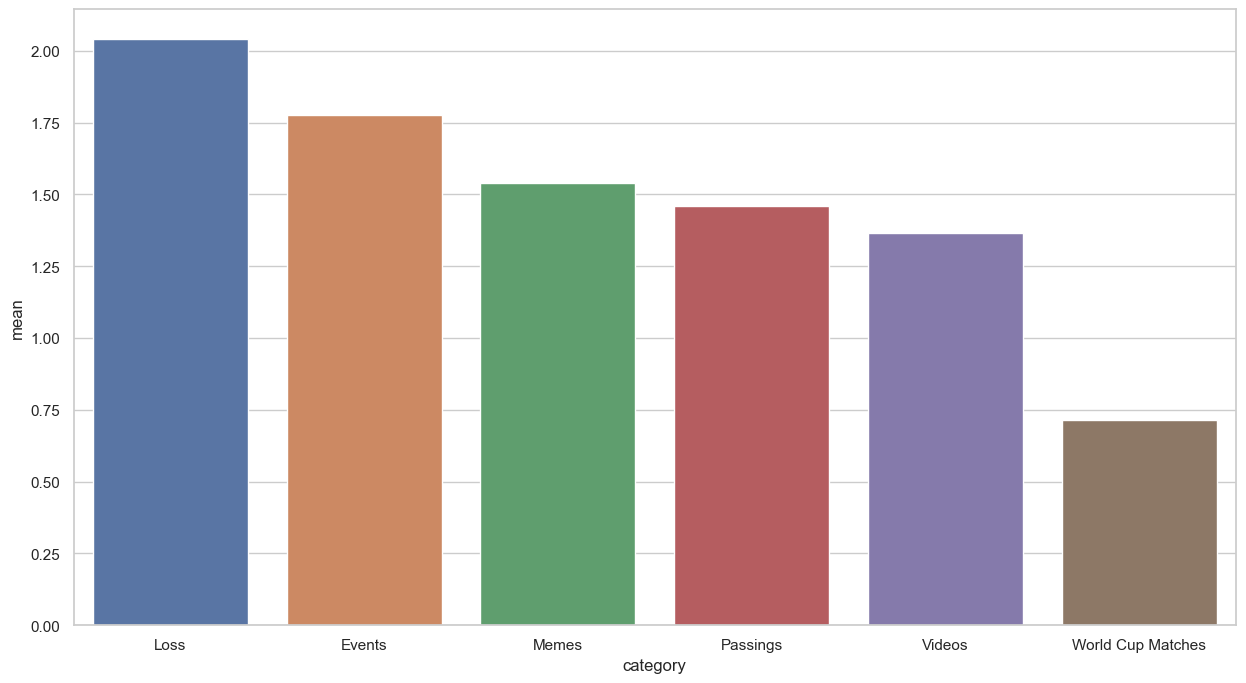

In [126]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=categories_grouped.tail(6), x="category", y="mean", palette = sns.color_palette())
#plt.savefig("mean_popularity_level_per_category_lowest.png")
plt.show

#### Conclusion: very different mean popularity levels per category

#### How are the popularity levels inside a category?

In [106]:
#for example category people
people_queries = model_and_val_dataset[model_and_val_dataset['category'] == 'People'].reset_index(drop=True)

In [130]:
#people_queries

<function matplotlib.pyplot.show(close=None, block=None)>

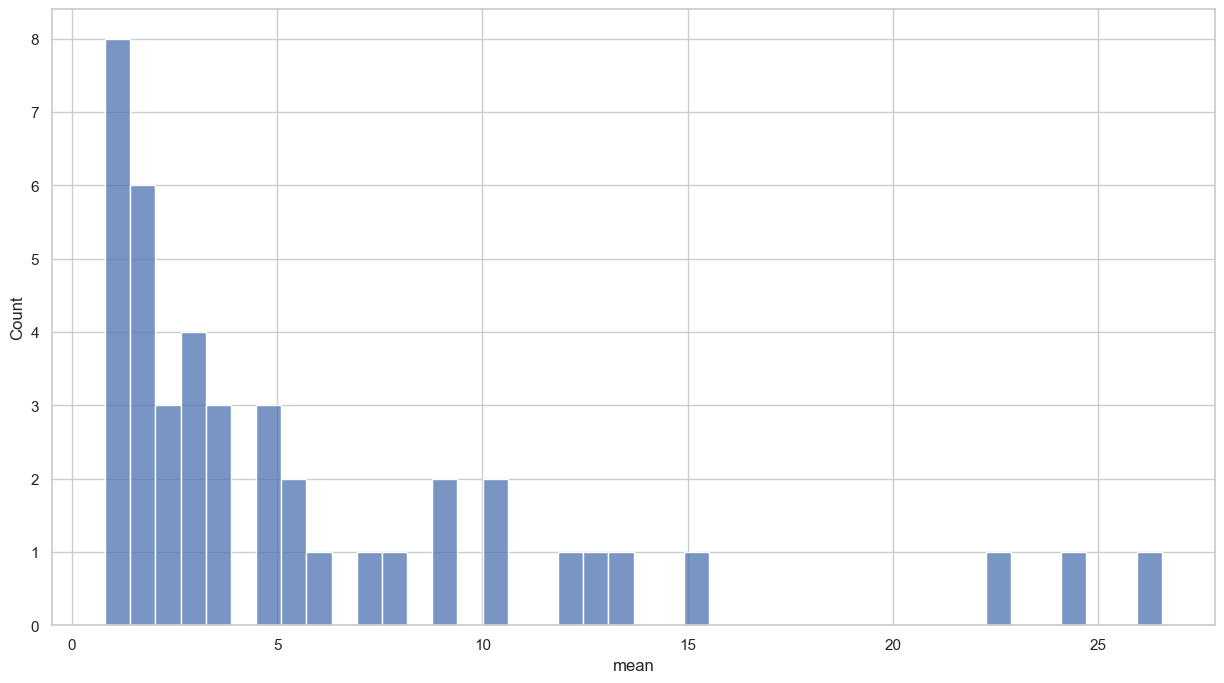

In [111]:
plt.figure(figsize=(15,8))
ax = sns.histplot(data=people_queries, x="mean", bins=42)
#plt.savefig("mean_popularity_level_per_category_lowest.png")
plt.show

#### Conclusion: Inside the category 'people' the mean popularity level per search query varies from 1 to 26

In [112]:
search_queries = model_and_val_dataset[model_and_val_dataset['category'] == 'Searches'].reset_index(drop=True)

In [127]:
#search_queries

In [129]:
model_and_val_dataset[model_and_val_dataset['category'] == 'Passings'].reset_index(drop=True)

,Query,category,1,2,3,4,5,6,7,8,...,224,225,226,227,228,229,230,231,232,mean
0,Nipsey Hussle,Passings,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.952586
1,Julen,Passings,0,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.672414
2,Karl Lagerfeld,Passings,1,1,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,6.0,6.0,7.0,8.0,7.0,6.0,6.0,7.0,3.146552
3,Emiliano Sala,Passings,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,1.060345
